In [120]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r'adult.csv')
df.head(5)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [121]:

df_missing = (df=='?').sum()
df_missing


age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [122]:
df = df[df['workclass'] !='?']
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [123]:
df_categorical = df.select_dtypes(include=['object'])

df_categorical.apply(lambda x: x=='?',axis=1).sum()

workclass           0
education           0
marital.status      0
occupation          7
relationship        0
race                0
sex                 0
native.country    556
income              0
dtype: int64

In [127]:
df = df[df['occupation'] !='?']
df = df[df['native.country'] !='?']
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30162 non-null  int64   
 1   fnlwgt          30162 non-null  int64   
 2   education.num   30162 non-null  int64   
 3   capital.gain    30162 non-null  int64   
 4   capital.loss    30162 non-null  int64   
 5   hours.per.week  30162 non-null  int64   
 6   workclass       30162 non-null  int32   
 7   education       30162 non-null  int32   
 8   marital.status  30162 non-null  int32   
 9   occupation      30162 non-null  int32   
 10  relationship    30162 non-null  int32   
 11  race            30162 non-null  int32   
 12  sex             30162 non-null  int32   
 13  native.country  30162 non-null  int32   
 14  income          30162 non-null  category
dtypes: category(1), int32(8), int64(6)
memory usage: 2.6 MB


Number of Observations in adult dataset: (30162, 15)


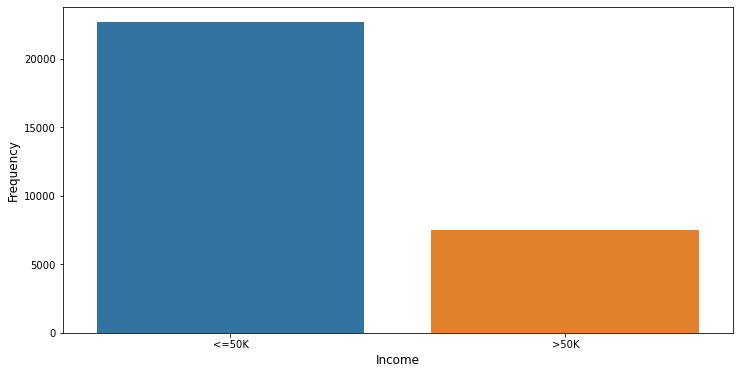

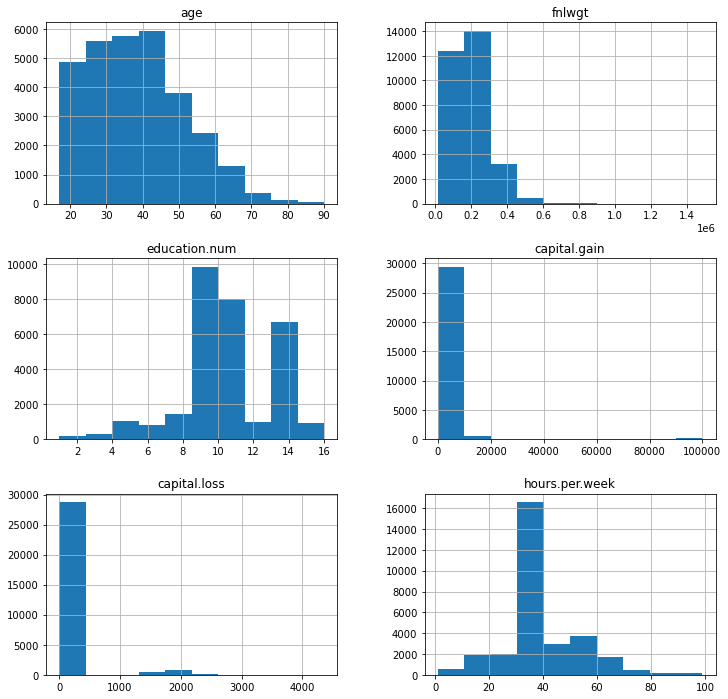

<Figure size 1224x432 with 0 Axes>

In [125]:
print("Number of Observations in adult dataset:",df.shape)



    
plt.figure(figsize =(12,6));
sns.countplot(x = 'income', data =df);
plt.xlabel("Income",fontsize = 12);
plt.ylabel("Frequency",fontsize = 12);  

df[list(num_col.index)].hist(figsize = (12,12));



table_occu = pd.crosstab(df['occupation'], df['income'])
table_workclass = pd.crosstab(df['workclass'], df['income'])
table_edu = pd.crosstab(df['education'], df['income'])
table_marital = pd.crosstab(df['marital.status'], df['income'])
table_race = pd.crosstab(df['race'], df['income'])
table_sex = pd.crosstab(df['sex'], df['income'])
table_country = pd.crosstab(df['native.country'], df['income'])

fig = plt.figure(figsize = (17,6))






In [126]:
from sklearn import preprocessing

df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()
df = df.drop(df_categorical.columns,axis=1)
df = pd.concat([df,df_categorical],axis=1)
df.head()

df['income'] = df['income'].astype('category')
from sklearn.model_selection import train_test_split
X = df.drop('income',axis=1)
y = df['income']
X.head(3)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=99)
X_train.head()
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train,y_train)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_pred_default = dt_default.predict(X_test)
print(classification_report(y_test,y_pred_default))
print('accuracy:')
print(accuracy_score(y_test,y_pred_default)*100)

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      6867
           1       0.78      0.52      0.63      2182

    accuracy                           0.85      9049
   macro avg       0.82      0.74      0.77      9049
weighted avg       0.84      0.85      0.84      9049

accuracy:
85.04807161012266


In [139]:
# !conda install graphvizfrom IPython.display import Image  
# from sklearn.externals.six import StringIO  
# from sklearn.tree import export_graphviz
# import pydotplus,graphviz


# # Putting features
# features = list(df.columns[1:])
# features
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'
# dot_data = StringIO()  
# export_graphviz(dt_default, out_file=dot_data,
#                 feature_names=features, filled=True,rounded=True)

# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - ipython.display
  - import
  - graphvizfrom
  - image

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




InvocationException: GraphViz's executables not found